<a href="https://colab.research.google.com/github/monicaneli/Sistema_de_Recomendacao_por_Imagens/blob/main/Sistema_de_Recomendacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sistema de recomendação por imagens

Sistema de Recomendação baseado em similaridade visual

Depois de entender o funcionamento de Sistemas de Recomendação e suas aplicações, neste projeto vamos então desenvolver um modelo capaz de classificar imagens por sua similaridade e gerar resultados para o usuário de um site. Os resultados esperados são direcionados para, por meio de um produto buscado na internet, o Sistema de Recomendação deve indicar produtos relacionados, mas não por seus dados textuais (preço, modelo, marca, loja) e, sim, por sua aparência física (formato, cor, textura, etc).  

Para que este sistema seja desenvolvido, vamos treinar uma rede de Deep Learning com várias classes de objetos, como por exemplo: relógio, camiseta, bicicleta, sapato, etc.  Dentro de cada classe devemos ter objetos que são parecidos em sua aparência, como pode ser visto na figura a seguir:

Figura 1: Objetos similares em sua aparência.



Descrição do Desafio
Sistema de recomendação por imagens
Depois de entender o funcionamento de Sistemas de Recomendação e suas aplicações, neste projeto vamos então desenvolver um modelo capaz de classificar imagens por sua similaridade e gerar resultados para o usuário de um site. Os resultados esperados são direcionados para, por meio de um produto buscado na internet, o Sistema de Recomendação deve indicar produtos relacionados, mas não por seus dados textuais (preço, modelo, marca, loja) e, sim, por sua aparência física (formato, cor, textura, etc).  

Para que este sistema seja desenvolvido, vamos treinar uma rede de Deep Learning com várias classes de objetos, como por exemplo: relógio, camiseta, bicicleta, sapato, etc.  Dentro de cada classe devemos ter objetos que são parecidos em sua aparência, como pode ser visto na figura a seguir:




Figura 1: Objetos similares em sua aparência.  



Para exemplo, podemos então utilizar o sistema de recomendação por imagens apresentado a seguir: https://colab.research.google.com/github/sparsh-ai/rec-tutorials/blob/master/_notebooks/2021-04-27-image-similarity-recommendations.ipynb


In [6]:
# Instalações e Imports
!pip install faiss-cpu
#!pip install faiss-gpu faiss-cpu
import numpy as np
import matplotlib.pyplot as plt
import faiss
import glob
import os

from tensorflow.keras.applications import resnet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 30.6 MB/s eta 0:00:00


In [7]:
# Funções

#Função para extrair embeddings
def get_embedding(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = resnet50.preprocess_input(x)
    embedding = model.predict(x)
    return embedding / np.linalg.norm(embedding)  # normalizar


#Função de recomendação
def recommend(img_path, k=3):
    query_emb = get_embedding(img_path).astype("float32")
    D, I = index.search(query_emb, k)  # D = distâncias, I = índices
    print("Imagens mais similares para:", img_path)

    # Mostrar resultados
    plt.figure(figsize=(10, 4))
    plt.subplot(1, k+1, 1)
    plt.imshow(image.load_img(img_path))
    plt.title("Consulta")
    plt.axis("off")

    for i, idx in enumerate(I[0]):
        plt.subplot(1, k+1, i+2)
        plt.imshow(image.load_img(image_paths[idx]))
        plt.title(f"Sim {i+1}")
        plt.axis("off")
    plt.show()



In [2]:
# Base de dados
!gdown 1TclrpQOF_ullUP99wk_gjGN8pKvtErG8 -O Stanford_Online_Products.zip
!unzip Stanford_Online_Products.zip
rm -rf Stanford_Online_Products.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: /content/Stanford_Products/Stanford_Online_Products/mug_final/391217829475_4.JPG  
  inflating: /content/Stanford_Products/Stanford_Online_Products/mug_final/271927317253_2.JPG  
  inflating: /content/Stanford_Products/Stanford_Online_Products/mug_final/391018865779_5.JPG  
  inflating: /content/Stanford_Products/Stanford_Online_Products/mug_final/161559270421_5.JPG  
  inflating: /content/Stanford_Products/Stanford_Online_Products/mug_final/171808572954_2.JPG  
  inflating: /content/Stanford_Products/Stanford_Online_Products/mug_final/231456834036_2.JPG  
  inflating: /content/Stanford_Products/Stanford_Online_Products/mug_final/301593961236_6.JPG  
  inflating: /content/Stanford_Products/Stanford_Online_Products/mug_final/281765898130_0.JPG  
  inflating: /content/Stanford_Products/Stanford_Online_Products/mug_final/271936543624_2.JPG  
  inflating: /content/Stanford_Products/Stanford_Online_Products/mug_final/32

In [14]:
# Preparar o dataset

# Pegar algumas categorias
categories = ["bicycle_final", "chair_final", "lamp_final", "mug_final", "sofa_final"]

base_path = "/content/Stanford_Products/Stanford_Online_Products/"
image_paths = []
labels = []

for cat in categories:
    files = glob.glob(os.path.join(base_path, cat, "*.*"))
    files = [f for f in files if f.lower().endswith((".jpg", ".jpeg", ".png"))]
    image_paths.extend(files[:200])  # limitar para não estourar memória
    labels.extend([cat] * len(files[:200]))

print("Total de imagens carregadas:", len(image_paths))
#print("Exemplo:", image_paths[:3])

Total de imagens carregadas: 1000
Exemplo: ['/content/Stanford_Products/Stanford_Online_Products/bicycle_final/361352349402_2.JPG', '/content/Stanford_Products/Stanford_Online_Products/bicycle_final/151709187034_4.JPG', '/content/Stanford_Products/Stanford_Online_Products/bicycle_final/390562919431_5.JPG']


In [17]:
# Imagens de teste
!wget -O mug.jpg "https://github.com/monicaneli/Sistema_de_Recomendacao_por_Imagens/raw/032a3f7da37068466fc9799f9622a4c41bf93434/pexels-pixabay-50676.jpg"
!wget -O sofa.jpg "https://github.com/monicaneli/Sistema_de_Recomendacao_por_Imagens/raw/032a3f7da37068466fc9799f9622a4c41bf93434/pexels-heyho-8135260.jpg"
!wget -O lamp.jpg "https://github.com/monicaneli/Sistema_de_Recomendacao_por_Imagens/raw/032a3f7da37068466fc9799f9622a4c41bf93434/pexels-446120723-15524191.jpg"

--2025-09-16 00:03:48--  https://github.com/monicaneli/Sistema_de_Recomendacao_por_Imagens/raw/032a3f7da37068466fc9799f9622a4c41bf93434/pexels-pixabay-50676.jpg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/monicaneli/Sistema_de_Recomendacao_por_Imagens/032a3f7da37068466fc9799f9622a4c41bf93434/pexels-pixabay-50676.jpg [following]
--2025-09-16 00:03:49--  https://raw.githubusercontent.com/monicaneli/Sistema_de_Recomendacao_por_Imagens/032a3f7da37068466fc9799f9622a4c41bf93434/pexels-pixabay-50676.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19052 (19K) [image/jpeg]
Saving to: ‘mug.jpg’

m

In [8]:
# Carregar modelo pré-treinado (sem a última camada)
# Base: ResNet50 treinada no ImageNet
base_model = resnet50.ResNet50(weights="imagenet", include_top=True)
# Usar a penúltima camada (embeddings de 2048 dimensões)
model = Model(inputs=base_model.input, outputs=base_model.layers[-2].output)


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [15]:
# Extrair embeddings e indexar com FAISS

# Criar matriz de embeddings
embeddings = []
for path in image_paths:
    emb = get_embedding(path)
    embeddings.append(emb)

embeddings = np.vstack(embeddings).astype("float32")

# Criar índice FAISS
d = embeddings.shape[1]  # dimensão do vetor
index = faiss.IndexFlatL2(d)  # distância euclidiana
index.add(embeddings)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

## Recomendando produtos


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
Imagens mais similares para: /content/mug.jpg


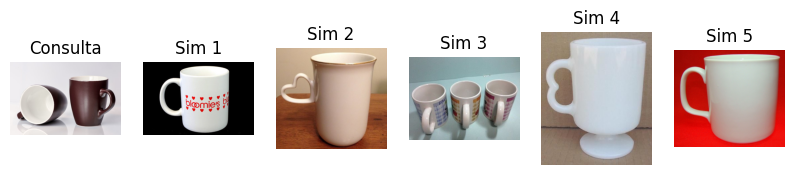

In [18]:
recommend("/content/mug.jpg", k=5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
Imagens mais similares para: /content/sofa.jpg


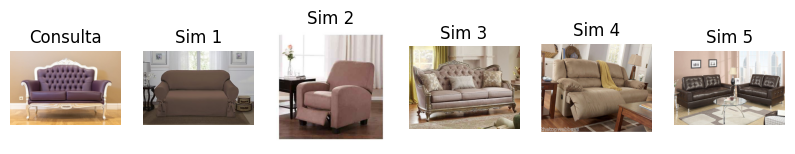

In [19]:
recommend("/content/sofa.jpg", k=5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
Imagens mais similares para: /content/lamp.jpg


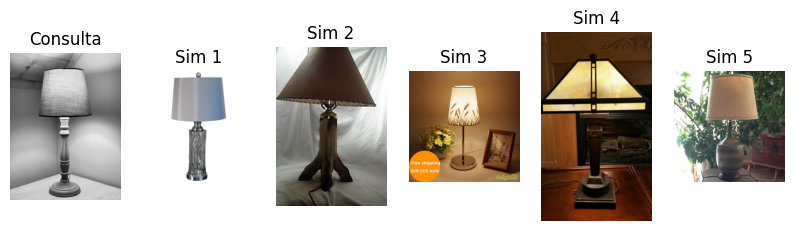

In [22]:
recommend("/content/lamp.jpg", k=5)

## Referências

[1] Stanford Online Products dataset ([Descrição no GitHub](https://github.com/rksltnl/Deep-Metric-Learning-CVPR16))

[2] Imagens obtidas do [Pexels](https://www.pexels.com/)

[3] Similar Product Recommendations ([no GitHub](https://github.com/sparsh-ai/rec-tutorials/blob/master/_notebooks/2021-04-27-image-similarity-recommendations.ipynb))